In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/home/gis-local/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('./kc_house_data.csv')
data.shape

(3165, 21)

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [4]:
# Remove the fields from the data set that we don't want to include in our model
# Having too many variables could potentially cause your model to become less accurate
print(data['zipcode'].unique())
del data['id']
del data['date']
del data['zipcode']
# del data['lat']
# del data['long']
del data['sqft_living15']
del data['sqft_lot15']

[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


In [5]:
# we can see that the dataset is highly distributed.
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
count,3.165000e+03,3165.000000,3165.000000,3165.000000,3.165000e+03,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000
mean,5.354183e+05,3.381359,2.071564,2070.030964,1.524746e+04,1.434755,0.009795,0.244234,3.459084,7.615482,1761.024329,309.006635,1967.480885,94.638863,47.557908,-122.212364
std,3.808415e+05,0.895398,0.768327,920.106459,4.253820e+04,0.507771,0.098498,0.776188,0.682533,1.166191,815.906643,459.089397,28.094781,424.375685,0.140785,0.139564
min,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,47.177500,-122.514000
25%,3.150000e+05,3.000000,1.500000,1430.000000,5.455000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,47.459800,-122.324000
50%,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1969.000000,0.000000,47.572600,-122.226000
75%,6.400000e+05,4.000000,2.500000,2500.000000,1.122000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,47.680400,-122.124000
max,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,47.777600,-121.315000


In [6]:
data = data.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 16 columns):
price            3165 non-null float64
bedrooms         3165 non-null float64
bathrooms        3165 non-null float64
sqft_living      3165 non-null float64
sqft_lot         3165 non-null float64
floors           3165 non-null float64
waterfront       3165 non-null float64
view             3165 non-null float64
condition        3165 non-null float64
grade            3165 non-null float64
sqft_above       3165 non-null float64
sqft_basement    3165 non-null float64
yr_built         3165 non-null float64
yr_renovated     3165 non-null float64
lat              3165 non-null float64
long             3165 non-null float64
dtypes: float64(16)
memory usage: 395.7 KB


In [7]:
print("null values: ", data.isnull().values.any())
y = data["price"]
data = data.drop(['price'], axis=1)

null values:  False


[3. 2. 4. 5. 1. 6. 7. 0. 8.]


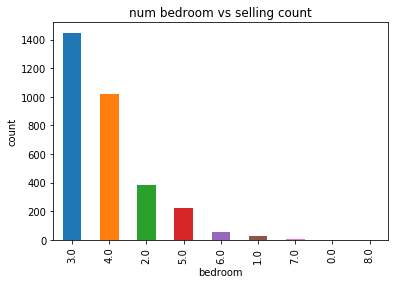

In [8]:
# using this data we can see 3 bedroom flats has higher number of chances of being sold.
print(data["bedrooms"].unique())
data["bedrooms"].value_counts().plot(kind="bar")
plt.title("num bedroom vs selling count")
plt.xlabel("bedroom")
plt.ylabel("count")
plt.show()

Text(0.5,1,'price vs batrooms')

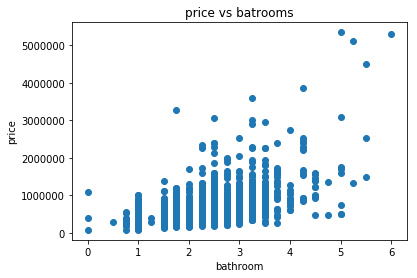

In [9]:
plt.scatter(data.bathrooms, y)
plt.xlabel("bathroom")
plt.ylabel("price")
plt.title("price vs batrooms")

Text(0.5,1,'price vs sqft_living')

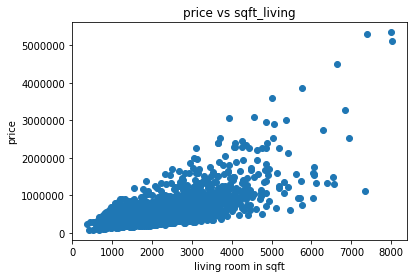

In [10]:
# we can see that the points are from 300 sq to 5000 sq are mostly sold
plt.scatter(data.sqft_living, y)
plt.xlabel("living room in sqft")
plt.ylabel("price")
plt.title("price vs sqft_living")

Text(0.5,1,'price vs sqft_lot')

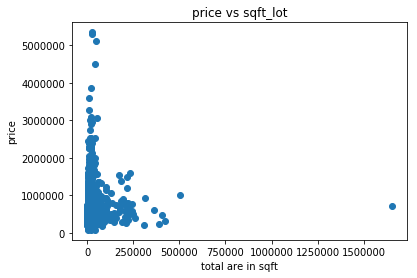

In [11]:
# total are in sqft
# we can see that a data with a higher sqft_lot has been sold for less amount and even houses with less area are sold
# for high values, may be there are other reasons for that.
plt.scatter(data.sqft_lot, y)
plt.xlabel("total are in sqft")
plt.ylabel("price")
plt.title("price vs sqft_lot")

Text(0.5,1,'price vs floor')

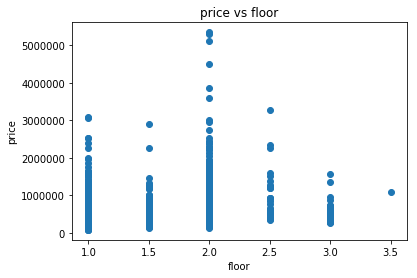

In [12]:
# price of floor also effect the price
plt.scatter(data.floors, y)
plt.xlabel("floor")
plt.ylabel("price")
plt.title("price vs floor")

Text(0.5,1,'price vs view')

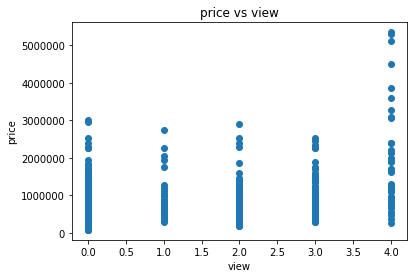

In [13]:
plt.scatter(data.view, y)
plt.xlabel("view")
plt.ylabel("price")
plt.title("price vs view")

In [14]:
data["condition"].unique()

array([3., 5., 4., 1., 2.])

In [15]:
data['yr_built'].unique()

array([1955., 1951., 1933., 1965., 1987., 2001., 1995., 1963., 1960.,
       2003., 1942., 1927., 1977., 1900., 1979., 1994., 1916., 1921.,
       1969., 1947., 1968., 1985., 1941., 1915., 1909., 1948., 2005.,
       1929., 1981., 1930., 1904., 1996., 2000., 1984., 2014., 1922.,
       1959., 1966., 1953., 1950., 2008., 1991., 1954., 1973., 1925.,
       1989., 1972., 1986., 1956., 2002., 1992., 1964., 1952., 1961.,
       2006., 1988., 1962., 1939., 1946., 1967., 1975., 1980., 1910.,
       1983., 1978., 1905., 1971., 2010., 1945., 1924., 1990., 1914.,
       1926., 2004., 1923., 2007., 1976., 1949., 1999., 1901., 1993.,
       1920., 1997., 1943., 1957., 1940., 1918., 1928., 1974., 1911.,
       1936., 1937., 1982., 1908., 1931., 1998., 1913., 2013., 1907.,
       1958., 2012., 1912., 2011., 1917., 1932., 1944., 1902., 2009.,
       1903., 1970., 2015., 1934., 1938., 1919., 1906., 1935.])

Text(0.5,1,'price vs yr_built')

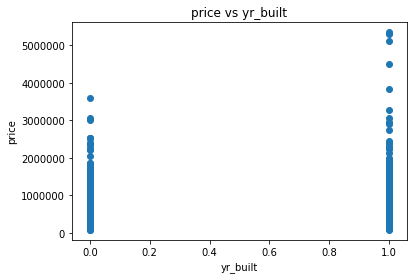

In [16]:
data['yr_built'] = np.where(data['yr_built'] < 1960, 0, data['yr_built'])
data['yr_built'] = np.where(data['yr_built'] > 1959, 1, data['yr_built'])
plt.scatter(data.yr_built, y)
plt.xlabel("yr_built")
plt.ylabel("price")
plt.title("price vs yr_built")

max value:  2015.0
min value:  0.0
(3165,)
(150,)


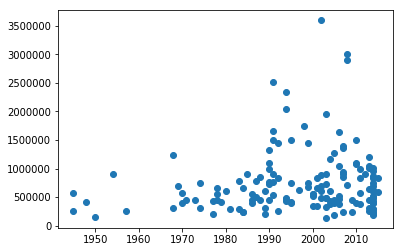

In [17]:
print("max value: ", data['yr_renovated'].max())
print("min value: ", data['yr_renovated'].min())
print(data['yr_renovated'].shape)
# df.dropna() 
datayr_renovated1 = data['yr_renovated'][data['yr_renovated'] != 0]
datay = y[data['yr_renovated'] != 0]
print(datayr_renovated1.shape)
plt.scatter(datayr_renovated1, datay)

In [18]:
# we can see that the there small dataset with renovation before 1965
# we will consider 0 for renovation done before 1995 and 1 for renovation after it 
data['yr_renovated'] = np.where(data['yr_renovated'] < 1960, 0, data['yr_renovated'])
data['yr_renovated'] = np.where(data['yr_renovated'] > 1950, 1, data['yr_renovated'])
print(data['yr_renovated'].unique())
x = data
x.isnull().any()

[0. 1.]


bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
lat              False
long             False
dtype: bool

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [20]:
import time
t = time.time()
model = LinearRegression(n_jobs=10)
model.fit(x_train, y_train)
print("accurracy score: ", model.score(x_test, y_test))
print("time taken: ", time.time()-t)

accurracy score:  0.6423140535078029
time taken:  0.007030010223388672


In [21]:
from sklearn import ensemble
t = time.time()
model = ensemble.GradientBoostingRegressor(
    n_estimators=1400,        #how many decision trees to build
    learning_rate=0.01,        #how much each additional decision tree influences the overall prediction
    max_depth=6,              #how many layers deep each decision tree is
    min_samples_leaf=9,       # minimum samples must exhibit similar behavior for decision tree to make decision around it
    max_features=0.1,         # percentage of features to choose each time we create branch in decision tree
    loss='huber',             #how scikit calculates model's error rate or cost as it learns
    random_state=0            #used to determine random seed passed to random number generator
)
model.fit(x_train, y_train) 
print("accurracy score: ", model.score(x_test, y_test))
print("time taken: ", time.time()-t)

accurracy score:  0.8295631740594407
time taken:  3.6181483268737793


In [22]:
# changing the default parameters and training the model with GradientBoostingRegressor we can see that the accurracy increased by 10%